# 분류 모델의 성능 평가 지표

## **Accuracy (정확도)**
### **1. 타이타닉 생존자 예측**
- 사이킷런은 BaseEstimator를 상속받으면 Customized형태의 Estimator를 개발자가 생성할 수 있다.

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습을 하지 않고 성별에 따라 생존자를 예측하는 단순한 Classifer생성
# BaseEstimator 상속 받음

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, X, y = None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        
        return pred

**MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna("N", inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 첫 문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
# 타이타닉 생존자 예측
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습 / 예측/ 평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypred)))

Dummy Classifier의 정확도는 : 0.7877


이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 함

특히 정확도는 불균형한(imbalanced)레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.

### **2. MNIST 데이터 세트**
- 먼저 불균형한 데이터 세트와 Dummy Classifier를 생성

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

**digit 데이터 로드**

In [5]:
# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()
# digits 확인
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# 데이터 형태 확인
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

**7인 데이터 확인**

In [8]:
digits.target == 7

array([False, False, False, ..., False, False, False])

**7인 데이터는 1, 그 외 데이터는 0으로 변환**

In [9]:
# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환
# 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

**학습 / 테스트 데이터 세트로 분리 (default = 0.25)**

In [10]:
# 학습 / 테스트 데이터 세트로 분리 (default = 0.25)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

**분리된 학습 / 테스트 데이터 세트 각각 확인**

In [11]:
X_train

array([[ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [12]:
X_test

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1., 13., ..., 15.,  3.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.]])

In [13]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**불균형한 레이블 데이터 분포도 확인**
- 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인

In [15]:
print('y_test.shape : ', y_test.shape)
pd.Series(y_test).value_counts()

y_test.shape :  (450,)


0    405
1     45
dtype: int64

In [16]:
# 불균형한 레이블 데이터 분포도(value_counts()) 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


레이블 테스트 세트(y_test)개수 총 450개 중
- 7(True = 1)인 갯수 : 45개 
    - 10%
- 나머지 값(False = 0)인 개수 : 405개
    - 90%

**MyFakeClassifier를 이용해 예측과 평가 수행**  

In [17]:
# Dummy Classifier로 학습 / 예측 / 정확도 평가
fake_cl = MyFakeClassifier()
fake_cl.fit(X_train, y_train)
fakePred = fake_cl.predict(X_test)
accuracy = accuracy_score(y_test, fakePred)
print('정확도 : ', np.round((accuracy), 3))

정확도 :  0.9


In [18]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%이다.

단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%로 유수의 ML알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안되는 결과이다.

## **Confustion Matirx(오차 행렬)**
- 사이킷런은 오차 행렬을 구하기 위해 confusion_matrix API를 제공
- 정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현

In [19]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 MNIST의 fakepred와 
# 실제 결과인 y_test를 Confusion Matrix()인자로 입력해 오차 행력을 배열 형태로출력
confusion_matrix(y_test, fakePred)  # (참 값, 예측 값)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## **정밀도와 재현율**
- 앞의 타이타닉 예제에서는 정확도만 초점을 맞췄지만, 이번에 오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능 평가
- 사이킷런 API 사용
    - 정밀도 계산 : precision_score() API 
    - 재현율 게산 : recall_score() API

In [20]:
# 정밀도와 재현율 계산에 사용되는 예측값
# 앞에서 Dummy Classifier로 학습 후 예측한 값 : fakepred
# 앞에 다 있는 내용인데 흩어져 있어서 정밀도와 재현율 계산을 위해 다시 모아서 적음

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)

In [21]:
# 참고 : fakepred값 확인
# fakedpred ⇒ 모두 False
fakepred.astype(int).sum()

0

In [22]:
# 정밀도와 재현율 계산
# 정밀도 계산 : precision_score(실제값, 예측값)
# 재현율 계산 : recall_score(실제값, 예측값)
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정확도 : ', accuracy_score(y_test, fakepred))
print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정확도 :  0.9
정밀도 :  0.0
재현율 :  0.0


C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도는 90%이지만 정밀도, 재현율은 굉장히 작아 0으로 표현됨
- 분자인  T<sub>p</sub>가 0임

### **오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수**
- 평가를 간편하게 적용하기 위해 get_clf_eval() 함수 정의 (평가를 한꺼번에 호출 위함)
    - confusion_matrix
    - accurancy
    - percision
    - recall

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test, pred)      # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)          # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f} \n정밀도 : {1:.3f} \n재현율 : {2:.3f}' .format(accuracy, precision, recall))

**앞의 타이타닉 데이터 세트 전처리 작업 내용**

In [24]:
# 타이타닉 데이터 세트 전처리 작용 내용 (앞에서 했음)
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna("N", inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]  # 첫 문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

**타이타닉 데이터를 로지스틱 회귀로 분류 수행**
- 타이타닉 데이터를 다시 로드한 후 가공해 
- 로지스틱 회귀기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuacy, precision, recall평가를 수행

In [25]:
# 로지스틱 회귀 기반으로
# 타이타닉 생존자 예측하고
# confusion matrix, accuracy, precision, recall 평가 수행
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.810 
정밀도 : 0.746 
재현율 : 0.768


C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
# random_state=11
# 소수점 4자리까지
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849 
정밀도 : 0.774 
재현율 : 0.787


In [27]:
#ir_clf = LogisticRegression(solver='liblinear')

정밀도에 비해 재현율이 낮게 나왔다. 재현율 또는 정밀도를 좀 더 강화할 방법으로 **Trade-off**방법

## **Precision / Recall Trade-off**
- 정밀도 / 재현율 트레이드 오프 (Trade-off)

**predict_proba() 메소드**
- 타이타닉 생존자 데이터를 학습한 LogisticResgression객체에서
- predict_proba()메서드를 수행한 뒤 반환 값 확인하고
- predict() 메서드의 결과와 비교

In [28]:
# lr_clf = LogisiticRegression()
# predict_proba(테스트 피처 데이터 세트) : 예측 확률 반환
pred_proba = lr_clf.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('\npred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# predict(테스트 피처 데이터 세트) : 예측 결과 클래스 값 반환
pred = lr_clf.predict(X_test)

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)

print('\n두개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)

pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


- 첫 번째 칼럼은 0 Negative의 확률 (클래스 값 0에 대한 예측 확률)
- 두 번째 칼럼은 1 Positive의 확률 (클래스 값 0에 대한 예측 확률)

반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로,
- 첫 번째 칼럼 값 + 두 번째 칼럼 값 = 1이 된다.

맨 마지막 줄의 predict()메서드의 결과 비교에서도 나타나듯이, 
- 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측

- [0.85252649 0.14747351 **0**.       ]에서 최종 예측 값 = 0
- [0.89303676 0.10696324 **0**.       ]에서 최종 예측 값 = 0
- [0.93352957 0.06647043 **0**.       ]에서 최종 예측 값 = 0

In [29]:
# 참고 - predict값 확인
# predict(테스트 피처 데이터 세트) : 예측 결과 클래스 값 반환
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

## **Binarizer**

In [30]:
from sklearn.preprocessing import Binarizer

X = [[0.5, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.0)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


이 binarizer를 이용해 사이킷런 predict()의 의사(pseudo)코드 만들기

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 반환**
- 바로 앞 예제의 LogisticResgression객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률 값인 pred_proba 객체 변수 이용
- 이렇게 구한 최종 예측값에 대해 get_clf_eval()함수 적용해 평가 지표 출력

In [31]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값 = 0.5로 설정
custom_threshold = 0.5

# predict_proba() 반환값 ([0확률 1확률])의 두번째 컬럼
# 즉, Positive클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849 
정밀도 : 0.774 
재현율 : 0.787


이는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier객체에서 호출된 predict()로 계산된 지표 값과 정확히 같다.

In [32]:
# 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier객체에서 호출된 predict()로 계산된 지표 값
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849 
정밀도 : 0.774 
재현율 : 0.787


C:\Users\ftsv2\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


이를 통해 predict()가 predict_proba()에 기반함을 알 수 있다.

**분류 결정 임계값을 0.4로 변경**
- 분류 임계값을 낮추면 평가 지표가 어떻게 변하는지 확인

In [33]:
# Binarizer의 threshold 설정값을 0.4로 설정.
# 즉, 분류 결정 임곗값을 0.5 → 0.4로 낮춤
custom_threshold = 0.4

# predict_proba()반환값 ([0확률 1확률])이 두번째 컬럼
# 즉, Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832 
정밀도 : 0.718 
재현율 : 0.836


임계값을 낮추니까 정밀도는 떨어지고 재현율 값은 올라감
- 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준
- 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 
- 임곗값 값을 낮출수록
    - True값이 많아 지게 된다.

**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**
- 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표 조사
- 이를 위해 get_eval_by_threshold() 함수 정의

In [34]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 지정
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threshods list객체 내의 값을 차례로 iteration(반복)하면서 Evaluation(평가)수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)    


임곗값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832 
정밀도 : 0.718 
재현율 : 0.836

임곗값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849 
정밀도 : 0.766 
재현율 : 0.803

임곗값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849 
정밀도 : 0.774 
재현율 : 0.787

임곗값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866 
정밀도 : 0.836 
재현율 : 0.754

임곗값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877 
정밀도 : 0.882 
재현율 : 0.738


정밀도 / 재현율 트레이드 오프
- 한쪽을 향상시키면 다른 수치 감소하니까 적당한 수치 선택

### 아래 Cell 실행 (run) ❌
- 참고 : get_clf_eval함수

In [35]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test, pred)      # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)          # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f} \n정밀도 : {1:.3f} \n재현율 : {2:.3f}' .format(accuracy, precision, recall))

### **임곗값에 따른 정밀도 - 재현율 값 추출**
- precision_recall_curve()를 이용

**precision_recall_curve(실제값, 레이블 값이 1일 때의 예측 확률값)**
- 정밀도, 재현율, 임계값을 ndarray로 반환
- 임계값은 일반적으로 0.11 ~ 0.95 범위
- 정밀도와 재현율의 임계값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용

**예제**
- 반환되는 임계값이 너무 작은 값 단위로 많이 구성되어 있음
- 반환된 임곗값의 데이터 143건 (교재 147건)
- 임곗값을 15단계로 해서 샘플로 10건만 추출
- 좀 더 큰 값의 임곗값과 그때의 정밀도와 재현율 확인

In [36]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 presision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('[반환된 임계값 / 정밀도 / 재현율 배열의 shape]')
print('임계값 shape: ', thresholds.shape)
print('정밀도 shape: ', precisions.shape)
print('재현율 shape: ', recalls.shape)

idx = np.arange(0, thresholds.shape[0], 15)
print('\nsample index : ', idx)
print('임계값 sample : ', np.round(thresholds[idx], 3))
print('정밀도 sample : ', np.round(precisions[idx], 3))
print('재현율 sample : ', np.round(recalls[idx], 3))

[반환된 임계값 / 정밀도 / 재현율 배열의 shape]
임계값 shape:  (143,)
정밀도 shape:  (144,)
재현율 shape:  (144,)

sample index :  [  0  15  30  45  60  75  90 105 120 135]
임계값 sample :  [0.104 0.121 0.14  0.186 0.28  0.403 0.564 0.667 0.822 0.947]
정밀도 sample :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 sample :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [37]:
# 반환된 임계값 배열 행이 143건으로 
# 임계값을 15단계로 해서 샘플로 10건만 추출
thr_index = np.arange(0,thresholds.shape[0],15)

print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임곗값 :', np.round(thresholds[thr_index], 2))

# 15단계로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 :', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 : [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [38]:
# 다시 한꺼번에 정리
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 
**임곗값이 증가할 수록**
- 정밀도 값은 높아진다
- 재현율 값은 낮아진다

### **임곗값의 변경에 따른 정밀도 - 재현율 변화 곡선 시각화**
precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용
- 이 API를 이용해 정밀도와 재현율 곡선을 시각화

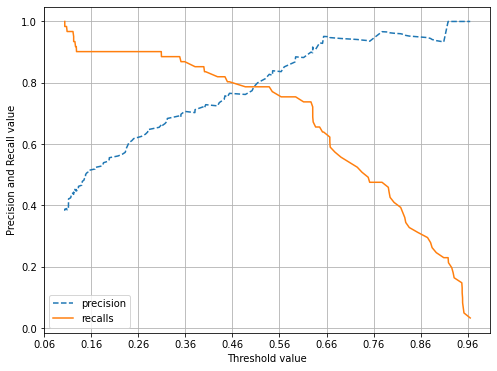

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제값 pred_proba_c1 : 예측 확률 값
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot수행
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]  # (143,)에서 143 추출
    # 정밀도는 점선으로, 재현율은 실선으로 표현
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recalls')
    
    # thresold값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

임계값이 낮을수록
- 많은 수의 양성 예측으로 인해 재현율이 극도로 높아지고 정밀도 값이 극도로 낮아진다.

임계값이 계속 증가시킬수록
- 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 된다.

앞 예제의 로지스틱 회귀 기반의 타이나틱 생존자 예측 모델의 경우 임곗값이 약 0.45지점에서 재현율과 정밀도가 비슷해지는 모습을 보였다.

**정밀도와 재현율의 맹점**

정밀도와 재현율 조합
- Positive 예측의 임계값에 따라 정밀도와 재현율 수치가 변경
- 임계값은 업무 환경에 맞게 정밀도와 재현율 수치를 상호 보완할 수 있는 수준에서 적용되어야 함
- 단순히 하나의 정능 지표 수치를 높이기 위한 수단으로 사용돼서는 안됨

분류의 종합적인 성능 평가에 사용하기 위해서는 **정밀도와 재현율의 수치를 적절하게 조합하는 것이 필요**함

## **F1 스코어 (Score)**

### **F1 Score**
- 정밀도와 재현율의 조화평균
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐

In [40]:
# 사이킷런의 F1스코어 API : f1_score()
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어 : {:0.4f}'.format(f1))

F1 스코어 : 0.7805


### **타이타닉 생존자 예측에서 F1 스코어**
f1_score() API 이용해 정밀도와 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존 모델 F1 스코어 구해보자
- 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
- 임계값 0.4~0.6별로 졍확도, 정밀도, 재현율, F1스코어 확인

In [53]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test, pred)      # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)          # 재현율
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    # f1 score print추가
    print('정확도 : {0:.3f} \n정밀도 : {1:.3f} \n재현율 : {2:.3f} \nF1 : {3:.4f}' .format(accuracy, precision, recall, f1))

In [54]:
# 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임곗값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832 
정밀도 : 0.718 
재현율 : 0.836 
F1 : 0.7727

임곗값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849 
정밀도 : 0.766 
재현율 : 0.803 
F1 : 0.7840

임곗값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849 
정밀도 : 0.774 
재현율 : 0.787 
F1 : 0.7805

임곗값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866 
정밀도 : 0.836 
재현율 : 0.754 
F1 : 0.7931

임곗값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877 
정밀도 : 0.882 
재현율 : 0.738 
F1 : 0.8036


F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여준다. 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주지하기 바람

## **ROC curve와 AUC**
사이킷런은 ROC곡선을 구하기 위해 roc_curve() API 제공
- 사용법은 precision_recall_curve() API와 유사
- 당지 반환값이 FPR, TPR, 임곗값으로 구성 됨

### **roc_curve() API를 이용한 타이타닉 생존자 예측 모델**
- 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값 구하기
- 앞의 정밀도와 재현율에서 학습한 LogisticRegression 객체의 predict_proba()결과 이용
    - 이를 이용해 roc_curve()의 결과 도출

In [57]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임계값 배열에서 샘플로 데이터 추출, 임계값을 5step으로 추출
# threshod[0]은 max(예측 확률) + 1 로 임의 설정되는데
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index], 2))
# 교재에서는 10개, 실제 11개

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


roc_curve()의 결과를 살펴보면
- 임곗값이 1에 가까운 값에서 점점 작아지면서 
- FPR은 조금씩 커진다
- TPR은 가파르게 커진다

**FPR의변화에 따른 TPR의 변화를 ROC곡선으로 시각화**

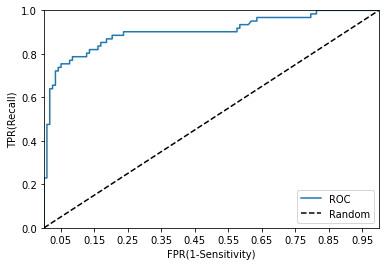

In [59]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1],[0, 1], 'k--', label = 'Random')
    
    # FPR X축의 Sclae을 0.1단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, pred_proba[:, 1])

일반적으로 ROC곡선 자체는 FPR와 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC곡선 면적에 기반한 AUC값으로 결정한다.

## **AUC (Area Under the Curve)**
- ROC곡선 아래 면적
- 대각선의 직선에 대응되면 AUC는 0.5
- 1에 가까울수록 좋은 수치
- FPR이 작을 때 얼마나 큰 TPR을 얻는지에 따라 결정

### **roc_auc_score() API 이용**
**타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값 확인**

In [61]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


**get_clf_eval()함수에 roc_auc_score()을 이용해 ROC AUC값 측정**
- roc_auc_score()을 이용해 ROC AUC값 측정 로직 추가
- ROC AUC는 예측 확률값을 기반으로 계산
- get_clf_eval()함수의 인자로 받을 수 있도록 함수형 변경
    - 정확도, 정밀도, 재현율, F1 스코어, ROC AUC값까지 출력

In [77]:
# get_clf_eval()변경
# ROC-AUC 추가 : 예측 학률값을 기반으로 계산되므로
# 매개변수 pred_proba = None 추가
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuarcy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred) 
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0:.3f} \n정밀도 : {1:.3f} \n재현율 : {2:.3f} \nF1 : {3:.4f} \nAUC : {4:.4f}' .format(accuracy, precision, recall, f1, roc_auc))

In [78]:
# 변경된 get_clf_eval() 호출 시 pred_proba_c1 추가
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [79]:
# 임계값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 확인
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.900 
정밀도 : 0.718 
재현율 : 0.836 
F1 : 0.7727 
AUC : 0.8333

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.900 
정밀도 : 0.766 
재현율 : 0.803 
F1 : 0.7840 
AUC : 0.8381

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.900 
정밀도 : 0.774 
재현율 : 0.787 
F1 : 0.7805 
AUC : 0.8341

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.900 
정밀도 : 0.836 
재현율 : 0.754 
F1 : 0.7931 
AUC : 0.8389

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.900 
정밀도 : 0.882 
재현율 : 0.738 
F1 : 0.8036 
AUC : 0.8434
